# Problem Statement 1:

In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('car.csv')

In [3]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df1.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df1.shape

(301, 9)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df1.isnull().sum() #no null values present

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df1.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2=df1.apply(le.fit_transform)
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,59,57,86,2,0,1,0
1,93,10,78,104,135,1,0,1,0
2,68,14,112,106,26,2,0,1,0
3,96,8,52,49,18,2,0,1,0
4,92,11,76,73,134,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,13,129,115,103,1,0,1,0
297,66,12,70,62,172,2,0,1,0
298,69,6,59,114,193,2,0,1,0
299,69,14,137,120,31,1,0,1,0


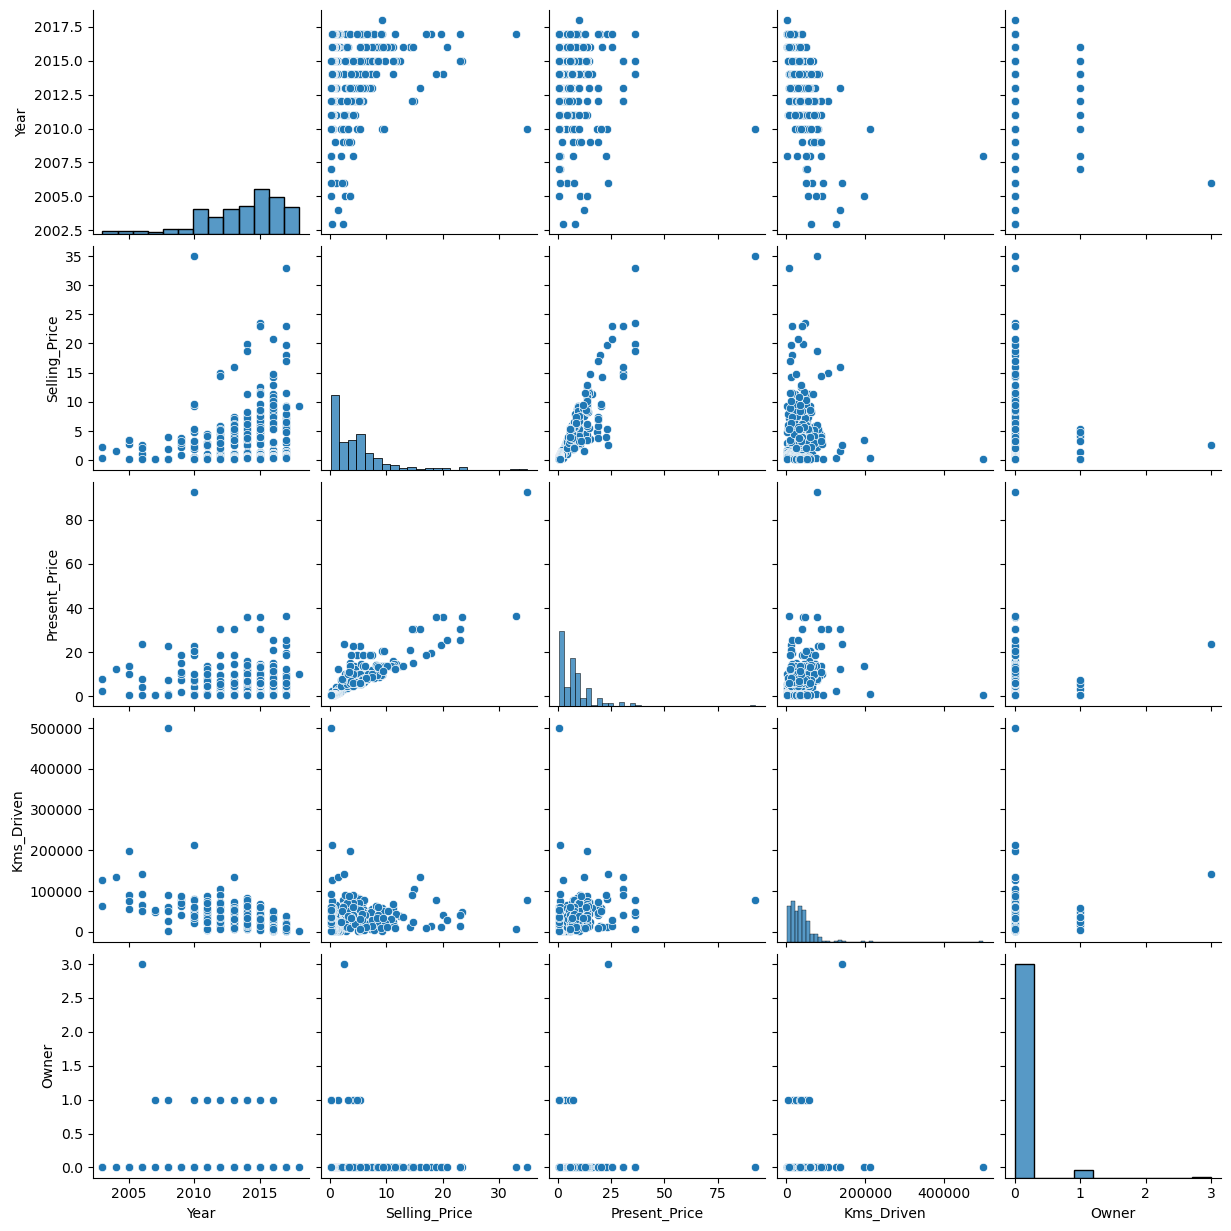

In [11]:
sns.pairplot(data=df1)
plt.show()

In [12]:
x=df2.iloc[:,[3,4,5,6,7,8]].values
x

array([[ 57,  86,   2,   0,   1,   0],
       [104, 135,   1,   0,   1,   0],
       [106,  26,   2,   0,   1,   0],
       ...,
       [114, 193,   2,   0,   1,   0],
       [120,  31,   1,   0,   1,   0],
       [ 62,  20,   2,   0,   1,   0]], dtype=int64)

In [13]:
x.shape

(301, 6)

In [14]:
y=df2.iloc[:,2]
y

0       59
1       78
2      112
3       52
4       76
      ... 
296    129
297     70
298     59
299    137
300     88
Name: Selling_Price, Length: 301, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)

0.975

In [18]:
y_pred=classifier.predict(x_test)
y_pred

array([ 82,  13,  59,  89, 152,  88,  65,  13,  90,  97,  43,  27,  55,
       106, 116, 136, 102,  70,  21,  39,  93,  81,  97, 131,   0,  26,
         0,  15,  15,  70,  56,  97,  15, 104,  71,  17,  87,  82,   6,
       135, 119, 152,  81,  56, 100, 139,  17,  17,  83,  89, 136,  56,
        45, 152,  35,  32,  20,  53,  55,  31,  91], dtype=int64)

In [19]:
from sklearn import metrics as sm

In [20]:
print('Errors----------')
print("mean_absolute_error=",sm.mean_absolute_error(y_test,y_pred))
print("mean_square_error=",sm.mean_squared_error(y_test,y_pred))

Errors----------
mean_absolute_error= 10.688524590163935
mean_square_error= 207.54098360655738


# Problem Statement 2

In [21]:
dataset=pd.read_excel('data_final.xlsx')

In [22]:
dataset.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [23]:
dataset.tail()

,observation,feature,price
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53
99,0.77,0.36,593.86


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [25]:
dataset.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

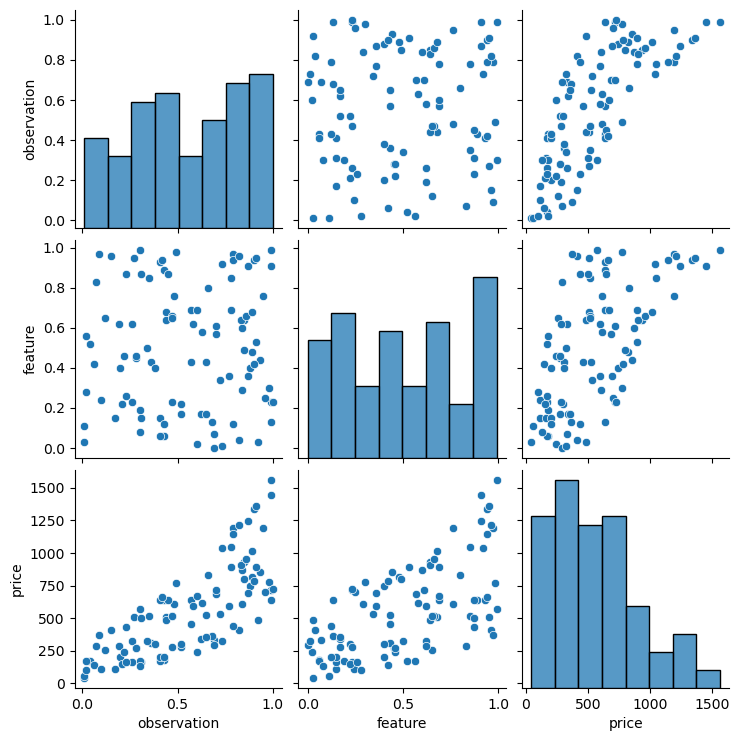

In [26]:
sns.pairplot(data=dataset)
plt.show()

In [27]:
x=dataset.iloc[:,:-1]
x

,observation,feature
0,0.44,0.68
1,0.99,0.23
2,0.84,0.29
3,0.28,0.45
4,0.07,0.83
...,...,...
95,0.99,0.13
96,0.28,0.46
97,0.87,0.36
98,0.23,0.87


In [28]:
y=dataset.iloc[:,-1]
y

0     511.14
1     717.10
2     607.91
3     270.40
4     289.88
       ...  
95    636.22
96    272.12
97    696.65
98    434.53
99    593.86
Name: price, Length: 100, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model1=model.fit(x_train,y_train)
model1

LinearRegression()

In [31]:
y_pred=model1.predict(x_test)
y_pred

array([ 426.09146539,   58.82595194,  671.86958179,   70.59925474,
        655.72394234,  237.66554823,  588.89726222,  571.74180841,
        677.2517328 ,  698.94769006,  751.25407187,  971.69207474,
       1054.21622072, 1151.03617141,  526.05107197,  399.51785749,
        986.38053984,  118.5888131 ,  890.9059235 ,  704.55433467])

In [32]:
model1.predict([[0.88,0.30]])

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([713.63615516])

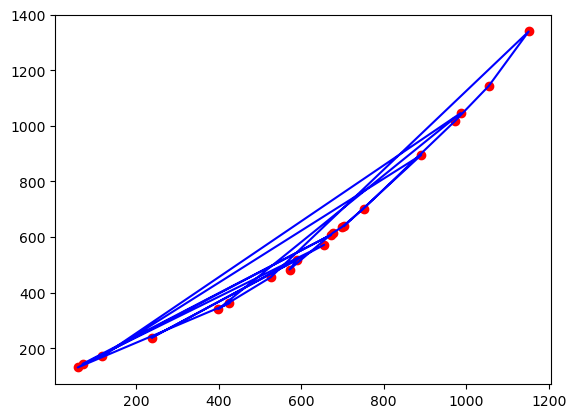

In [61]:
plt.scatter(y_pred,y_test,color='r')
plt.plot(y_pred,y_test,color='b')
plt.show()

# Multiple linear Regession is not giving b est fit line

In [33]:

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
x_pol=pf.fit_transform(x_train)
lg=LinearRegression()
lg1=lg.fit(x_pol,y_train)


In [34]:
y_pred=lg1.predict(pf.fit_transform(x_test))
y_pred

array([ 356.97041624,  131.48679167,  612.24585213,  141.46564912,
        574.45079704,  227.7049998 ,  522.44355571,  482.69995215,
        624.72075471,  632.03897372,  705.47890319, 1028.58725282,
       1152.75931229, 1322.04882209,  460.49939796,  337.77307228,
       1046.55961454,  159.74693596,  906.45307885,  643.47703027])

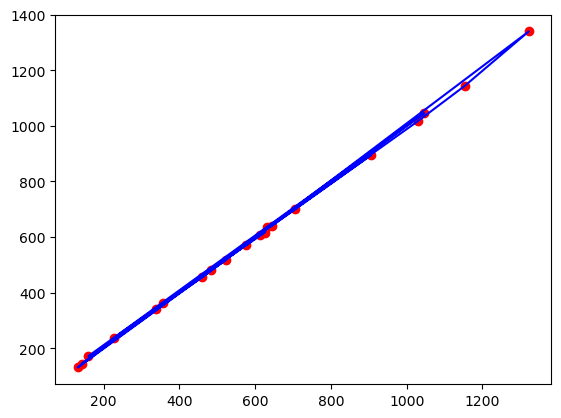

In [35]:
plt.scatter(y_pred,y_test,color='r')
plt.plot(y_pred,y_test,color='b')
plt.show()

# polynomial regession is giving best fit line.